# Análisis información Google Analytics 2019

    ¿Como entender mejor la iformación de Google Analytcis?
    ¿Productos más vendidos por mes? (Fuentes Medios, Edad, Sexo, Región)
    
Para un mejor análisis de la información realizamos un proces de Extracción, Transformación y Limpieza de los datos (ETL).

Realizaremos tablas y gráficas sobre los resultados.


In [1]:
#Paqueterías a usar

import os 
import re 
import pandas as pd
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import glob
import random

pd.set_option('display.float_format', lambda x: '%.f' % x)

os.chdir('/home/carlos/Documentos/3_Adsocial/Marketing/Analytics/librerias')
os.listdir()
#librería creada con funciones para facilitar la lectura del cuaderno jupyter.
import analytics

### Resumen sobre el proceso ETL (extracción, transformación, visualización).

#### Extracción reportes mensual

Se almacenan en carpetas dropbox, el programa se encarga de unir y alinear todos los archivos.

In [2]:
analytics_productos = analytics.Union_Archivos(Cuenta = ['Office Depot','Petco','RadioShack','Home Store'], analysis = 'General')
analytics_productos = analytics_productos.fillna('vacio')
tmp = analytics_productos.head()

tmp

/home/carlos/Documentos/3_Adsocial/Marketing/Analytics/librerias/analytics.py:41: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Cantidad  Cantidad media  Compras únicas       Fuente/Medio  \
0        19               1              19  (direct) / (none)   
1        46               5               9  (direct) / (none)   
2        19               2               9  (direct) / (none)   
3         9               1               9  (direct) / (none)   
4        28               1              28  (direct) / (none)   

  Importe de reembolso del producto  Ingresos del producto  \
0                             vacio                   1152   
1                             vacio                   2880   
2                             vacio                  28784   
3                             vacio                    976   
4                             vacio                   5268   

  Porcentaje carrito/detalle Porcentaje compra/detalle  Precio medio  \
0                      vacio                     vacio            61   
1                      vacio                     vacio            63   
2                      vacio                     vacio          1515   
3                      vacio                     vacio           108   
4                      vacio                     vacio           188   

                                     Producto Región  \
0                 ABACO BASICO (ROJO, 1 PZA.)  vacio   
1              ABRILLANTADOR DE MUEBLES WIEZE  vacio   
2     ADAPTADOR MULTIPUERTO USB-C A VGA APPLE  vacio   
3            AGENDA PERPETUA ANTIQUE BLUELINE  vacio   
4  ANTENA PARA TV GE MODERN LOP (NEGRO, HDTV)  vacio   

                                             archivo        cuenta  \
0  /home/carlos/Dropbox/Históricos GG/Históricos ...  Office Depot   
1  /home/carlos/Dropbox/Históricos GG/Históricos ...  Office Depot   
2  /home/carlos/Dropbox/Históricos GG/Históricos ...  Office Depot   
3  /home/carlos/Dropbox/Históricos GG/Históricos ...  Office Depot   
4  /home/carlos/Dropbox/Históricos GG/Históricos ...  Office Depot   

                fechas  
0  [20190801-20190831]  
1  [20190801-20190831]  
2  [20190801-20190831]  
3  [20190801-20190831]  
4  [20190801-20190831]

In [4]:
#Veamos que cuentas hemos unido
analytics_productos.archivo.value_counts()
analytics_productos.dtypes
analytics_productos.notnull().all()
analytics_productos.cuenta.value_counts()

Office Depot    60502
Petco           59166
RadioShack       7157
Home Store        140
Name: cuenta, dtype: int64

#### Tranformaciones y Limpieza de datos
    
    1.Formato de fechas, colocamos la fecha del reporte para extraer el mes del reporte
    2.Reducción del nombre del producto tomando las primeras 3 palabras
    3.Agrupacion por mes, cuenta, producto_nuevo
    4.Clasificamos la fuente de medios

     Objetivo: tenero mayor claridad de los datos.


Para este primer ejercicio trabajamos con 2019.

In [24]:
analytics_productos = analytics.Formato_Fechas_Analytics(analytics_productos, 'fechas')
analytics_productos['mes'] = pd.DatetimeIndex(analytics_productos['Fecha_inicio']).month.map(str)
analytics_productos = analytics_productos[analytics_productos.Fecha_inicio > '2018-12-01T00:00:00.000000000'] #solo 2019

analytics_productos.Fecha_inicio.value_counts().sort_values()

2019-12-01     3898
2019-11-01     4330
2019-03-01     7880
2019-02-01     7899
2019-04-01     8112
2019-01-01     9061
2019-09-01     9165
2019-08-01     9221
2019-10-01     9279
2019-06-01     9530
2019-05-01    10584
2019-07-01    10649
Name: Fecha_inicio, dtype: int64

Contamos con nombres en los productos muy distintos, tomamos las primeras 3 palabras para reducir el nombre del producto.

In [10]:
#Podemos ver que los nombres de los productos son muy diferentes
analytics_productos.groupby(['Producto','cuenta'], as_index = False).count().sort_values('Cantidad', ascending = False).loc[:,['cuenta','Producto','Cantidad']].head(10)

cuenta                                           Producto  \
13516         Petco  Whole Hearted Grain Free Alimento Natural para...   
2319   Office Depot      CAJA DE PAPEL OFFICE DEPOT (10 RESMAS, CARTA)   
9204          Petco  Natural Gourmet Para Perro Raza Mediana Y Gran...   
11110         Petco  Pro Plan Sensitive Skin Optiderma Alimento par...   
4635          Petco                              Equilibrium Artroflex   
11065         Petco  Pro Plan Optihealth Alimento para Perro Adulto...   
13481         Petco  Whole Earth Farms Grain Free Recipe Alimento N...   
11099         Petco  Pro Plan Reduced Calorie Optifit Alimento para...   
12433         Petco      Sophresh Arena Para Gato Control Dual 13.6 kg   
11989  Office Depot             SILLA TIPO PIEL RED TOP NY (NEGRO, PU)   

       Cantidad  
13516       153  
2319        117  
9204        106  
11110       103  
4635         99  
11065        95  
13481        93  
11099        93  
12433        90  
11989        88

Una ves limpio podremos ver con mayor claridad.

In [11]:
analytics_productos['Producto_nuevo'] = analytics.Formato_Producto(analytics_productos)
#Se tiene mayor claridad tomando soló las 3 primeras palabras
analytics_productos.groupby(['Producto_nuevo','cuenta'], as_index = False).count().sort_values('Cantidad', ascending = False).loc[:,['cuenta','Producto_nuevo','Cantidad']].head(10)

cuenta           Producto_nuevo  Cantidad
1159  Office Depot        cartucho de tinta      1804
5844         Petco      whole hearted grain      1469
3004         Petco           leaps & bounds      1298
2271         Petco                good 2 go      1295
5836         Petco            well and good       989
2459         Petco  hills prescription diet       787
834   Office Depot         botella de tinta       763
5170  Office Depot           sobre de papel       741
5865         Petco               you and me       693
1125  Office Depot   carpeta arillo redondo       639

La fuente medios en ocasiones no es muy clara, por lo que propusimos una clasificación.

In [12]:
#Limpieza de la fuente de medios
analytics_productos = analytics_productos.rename(columns = {'Fuente/Medio':'Fuente_Medio'})
analytics_productos['Fuente_Medio'] = analytics_productos['Fuente_Medio'].str.lower()

analytics_productos.groupby(['Fuente_Medio'], as_index = False).count().sort_values('Cantidad', ascending = False).loc[:,['Fuente_Medio','Cantidad']].head(10)

Fuente_Medio  Cantidad
592                                       google / cpc     31616
593                                   google / organic     22416
0                                    (direct) / (none)     16168
575                                 email / newsletter     13670
712                             rtbhouse / retargeting      3537
509                                         bing / cpc      1241
510                                     bing / organic       845
573                                  email / (not set)       804
535  com.google.android.googlequicksearchbox / refe...       803
652                     mx.search.yahoo.com / referral       634

In [13]:
#Agrupación una ves limpia la base para reducir su tamaño y claridad
analytics_productos_limpio = analytics_productos.groupby(['mes','cuenta','Fuente_Medio','Producto_nuevo'], as_index = False).sum()
analytics_productos_limpio['Fuente_categoria'] = analytics_productos_limpio['Fuente_Medio']

In [14]:
analytics_productos_limpio.sort_values('Cantidad', ascending = False).head(10)

mes        cuenta       Fuente_Medio            Producto_nuevo  \
15923   2  Office Depot  (direct) / (none)         vaso conico venus   
48493   8  Office Depot       google / cpc  cuaderno profesional sky   
34624   5         Petco       google / cpc  fancy feast inspirations   
979     1  Office Depot       google / cpc    carpeta arillo redondo   
31312   5  Office Depot       google / cpc   pantalla sansui smx32z1   
48376   8  Office Depot       google / cpc             caja de papel   
31714   5  Office Depot   google / organic     cinta adhesiva scotch   
12357  11  Office Depot   google / organic             caja de papel   
14028  12  Office Depot       google / cpc    carpeta arillo redondo   
30803   5  Office Depot       google / cpc             caja de papel   

       Cantidad  Cantidad media  Compras únicas  Ingresos del producto  \
15923      7186             449              16                 194033   
48493      6402             120             167                 120349   
34624      4359              80             335                  80642   
979        4048             348             251                 186712   
31312      3918               1            3897               17628083   
48376      3817              33            1366                2951856   
31714      3689             495             148                  73470   
12357      3618              17            1005                2583996   
14028      3500             141             224                 196856   
30803      3471              22            1273                2561062   

       Precio medio   Fuente_categoria  
15923            27  (direct) / (none)  
48493            56       google / cpc  
34624           111       google / cpc  
979            1703       google / cpc  
31312          4499       google / cpc  
48376          7123       google / cpc  
31714           339   google / organic  
12357          6170   google / organic  
14028           660       google / cpc  
30803          6315       google / cpc

#### Clasificación fuente de medios es la siguiente: 
    
    Si contiene la palabra adsocial implica Adsocial
    Si contiene la palabra referral implica otros sitios web
    Si contiene la palabra organic, bin, google / cpc implica organico
    Si contiene la palabra email implica email
    Si contiene la palabra tiendeo implica tiendeo
    Si contiene la palabra direct implica direct
    Si no contiene ninguna de las palabras anteriores lo clasificamos como otros ejemplo; rtbhouse / retargeting
    

In [33]:
#Ahora vamos a categorizar las fuentes medios, Adsocial, Otros sitios, Organico, Email, Tiendeo, direct, Otros.
analytics.Categoria(analytics_productos_limpio).Fuente_categoria.value_counts()

organico            31204
direct               9289
email                7528
otros_sitios_web     4344
otros                3049
Adsocial             2653
tiendeo               135
Name: Fuente_categoria, dtype: int64

En caso de querer validar alguna clasificación de fuente medios.

In [34]:
#Validación de alguna fuente categoria
validacion = analytics_productos_limpio[analytics_productos_limpio.Fuente_categoria == 'otros']
tmp = validacion.Fuente_Medio.value_counts().reset_index().sort_values('Fuente_Medio', ascending = False)

tmp.head(20)

index  Fuente_Medio
0                      rtbhouse / retargeting          2441
1                                       vacio           110
2              eluniversal.com.mx / promotion            55
3                             google / search            41
4                   picodi / banners_hot_sale            36
5                   hotsale / hotsale_website            30
6     cmi / shopping_module_venta-carrito_mkt            25
7                 kwanko / banner_ec_buen_fin            22
8                        rtb_house / hot_sale            20
9     cmi_shopping_module / shopping_hotsale_            20
10           picodi / banner_22_al_28_febrero            12
11          cmi / shopping_module_summer_sale            10
12           picodi / banner_18_al_21_febrero            10
13                            hp_sem / hp_sem            10
14               mosaic / native_ads_hot_sale             9
15      pro_plan / pro_plan_cachorro_complete             8
16          google / shopping_officedepot_ips             8
17          masterbase invexmktmx / (not set)             7
18       rtb_house / banner_ec_venta_nocturna             7
19  donde_lo_compro / donde_lo_compro_folleto             7

Clasificación por cuenta.

In [17]:
analytics_productos_limpio.Fuente_categoria.value_counts()
analytics_productos_limpio.groupby(['cuenta','Fuente_categoria']).count()

mes  Fuente_Medio  Producto_nuevo  Cantidad  \
cuenta       Fuente_categoria                                                  
Home Store   otros               110           110             110       110   
Office Depot Adsocial            728           728             728       728   
             direct             5014          5014            5014      5014   
             email              2000          2000            2000      2000   
             organico          19118         19118           19118     19118   
             otros              1393          1393            1393      1393   
             otros_sitios_web   1537          1537            1537      1537   
             tiendeo             120           120             120       120   
Petco        Adsocial           1652          1652            1652      1652   
             direct             3660          3660            3660      3660   
             email              5328          5328            5328      5328   
             organico           9359          9359            9359      9359   
             otros              1357          1357            1357      1357   
             otros_sitios_web   2398          2398            2398      2398   
             tiendeo               6             6               6         6   
RadioShack   Adsocial            273           273             273       273   
             direct              615           615             615       615   
             email               200           200             200       200   
             organico           2727          2727            2727      2727   
             otros               189           189             189       189   
             otros_sitios_web    409           409             409       409   
             tiendeo               9             9               9         9   

                               Cantidad media  Compras únicas  \
cuenta       Fuente_categoria                                   
Home Store   otros                        110             110   
Office Depot Adsocial                     728             728   
             direct                      5014            5014   
             email                       2000            2000   
             organico                   19118           19118   
             otros                       1393            1393   
             otros_sitios_web            1537            1537   
             tiendeo                      120             120   
Petco        Adsocial                    1652            1652   
             direct                      3660            3660   
             email                       5328            5328   
             organico                    9359            9359   
             otros                       1357            1357   
             otros_sitios_web            2398            2398   
             tiendeo                        6               6   
RadioShack   Adsocial                     273             273   
             direct                       615             615   
             email                        200             200   
             organico                    2727            2727   
             otros                        189             189   
             otros_sitios_web             409             409   
             tiendeo                        9               9   

                               Ingresos del producto  Precio medio  
cuenta       Fuente_categoria                                       
Home Store   otros                               110           110  
Office Depot Adsocial                            728           728  
             direct                             5014          5014  
             email                              2000          2000  
             organico                          19118         19118  
             otros                              1393          1393  

In [18]:
###errores en la información
#los archivos no contienen la columna fuente medio
tmp = analytics_productos[analytics_productos.cuenta == 'Home Store']

tmp.head()
###

Cantidad  Cantidad media  Compras únicas Fuente_Medio  \
0        44              11               4        vacio   
1        32               8               4        vacio   
2        18              18               1        vacio   
3        15               5               3        vacio   
4        14               5               3        vacio   

  Importe de reembolso del producto  Ingresos del producto  \
0                             vacio                   1540   
1                             vacio                   5408   
2                             vacio                   1782   
3                             vacio                   1035   
4                             vacio                  36386   

  Porcentaje carrito/detalle Porcentaje compra/detalle  Precio medio  \
0                      vacio                     vacio            35   
1                      vacio                     vacio           169   
2                      vacio                     vacio            99   
3                      vacio                     vacio            69   
4                      vacio                     vacio          2599   

                                    Producto  \
0        vaso hb modelo city cuadrado libbey   
1  gancho basic home "chocolate" (pack de 8)   
2                     vaso home inspirations   
3                        tazón inclinado mkm   
4               silla milán verde 542-200036   

                                             archivo      cuenta  \
0  /home/carlos/Dropbox/Históricos GG/Históricos ...  Home Store   
1  /home/carlos/Dropbox/Históricos GG/Históricos ...  Home Store   
2  /home/carlos/Dropbox/Históricos GG/Históricos ...  Home Store   
3  /home/carlos/Dropbox/Históricos GG/Históricos ...  Home Store   
4  /home/carlos/Dropbox/Históricos GG/Históricos ...  Home Store   

                fechas Fecha_inicio  Fecha_fin mes          Producto_nuevo  
0  [20190401-20190430]   2019-04-01 2019-04-30   4          vaso hb modelo  
1  [20190401-20190430]   2019-04-01 2019-04-30   4       gancho basic home  
2  [20190401-20190430]   2019-04-01 2019-04-30   4  vaso home inspirations  
3  [20190401-20190430]   2019-04-01 2019-04-30   4     tazón inclinado mkm  
4  [20190401-20190430]   2019-04-01 2019-04-30   4       silla milán verde

# Visualizaciones y análisis

La idea es entender el comportamiento de los productos por fuente, edad, genero y region.

### Veamos que encontramos por fuente de medios.

Porcentaje de la fuente de medios y una tabla resumen

¿Que producto es más vendido?


In [49]:
analytics_productos_limpio.groupby(['cuenta', 'Producto_nuevo'], as_index = False).sum().sort_values('Cantidad', ascending = False)

cuenta                 Producto_nuevo  Cantidad  Cantidad media  \
501   Office Depot                  caja de papel     53525             960   
2638  Office Depot       registrador office depot     46474             740   
2633  Office Depot       registrador lefort carta     36982             582   
514   Office Depot              caja para archivo     35994            2148   
584   Office Depot         carpeta arillo redondo     32690            2832   
614   Office Depot              cartucho de tinta     24225            2218   
3749         Petco             fancy feast petits     20294            3203   
3747         Petco       fancy feast inspirations     19477            2436   
4978         Petco            whole hearted grain     19090            1734   
673   Office Depot          cinta adhesiva scotch     17561            1385   
2907  Office Depot                 sobre de papel     17358            1446   
447   Office Depot               botella de tinta     15092            1008   
2446  Office Depot              pluma bic cristal     14797             835   
2148  Office Depot        notas adhesivas post-it     13956            1061   
2865  Office Depot               silla de oficina     13951             873   
2893  Office Depot                silla tipo piel     13616             538   
877   Office Depot     cuaderno profesional norma     13550             975   
4623         Petco              pro plan alimento     12717            1867   
2609  Office Depot           protectores de hojas     12528             789   
4293         Petco          natural gourmet pouch     12431            1423   
583   Office Depot               carpeta arillo d     12327            1180   
2212  Office Depot        pantalla sansui smx32z1     12041             107   
2995  Office Depot  sujetadocumentos office depot     11994             464   
4690         Petco               royal canin mini     11465             804   
3215  Office Depot              vaso conico venus     11018             988   
3748         Petco             fancy feast mousse     10829            1680   
1853  Office Depot    marcador permanente sharpie     10067             778   
854   Office Depot        cuaderno forma francesa      9693             810   
2248  Office Depot                 papel de color      9633             847   
1316  Office Depot           grapa estandar pilot      9529             167   
...            ...                            ...       ...             ...   
5105    RadioShack        antena exterior digital         1               1   
5403    RadioShack             divisor hibrido de         1               1   
5087    RadioShack      adaptaplug para audifonos         1               1   
5731    RadioShack       receptor bluetooth audio         1               1   
5732    RadioShack        receptor bluetooth auto         1               1   
5072    RadioShack            adaptador mini plug         1               1   
5735    RadioShack              receptor de carga         1               1   
5736    RadioShack            receptor para carga         1               1   
5431    RadioShack            empuniadura gopro           1               1   
5611    RadioShack           mouse logitech color         1               1   
5081    RadioShack      adaptador usb inalambrico         1               1   
5740    RadioShack      regulador forza fvr-2201m         1               1   
5424    RadioShack                drone vica drex         1               1   
5083    RadioShack              adaptador usb-c a         1               1   
5085    RadioShack                adaptador vga -         1               1   
4011         Petco  imagitarium acidificante, 118         1               1   
5762    RadioShack                 robot solar 14         1               1   
5088    RadioShack      adaptaplug para microfono         1               1   
5089    RadioShack      afinador cromatico cruzer         1   

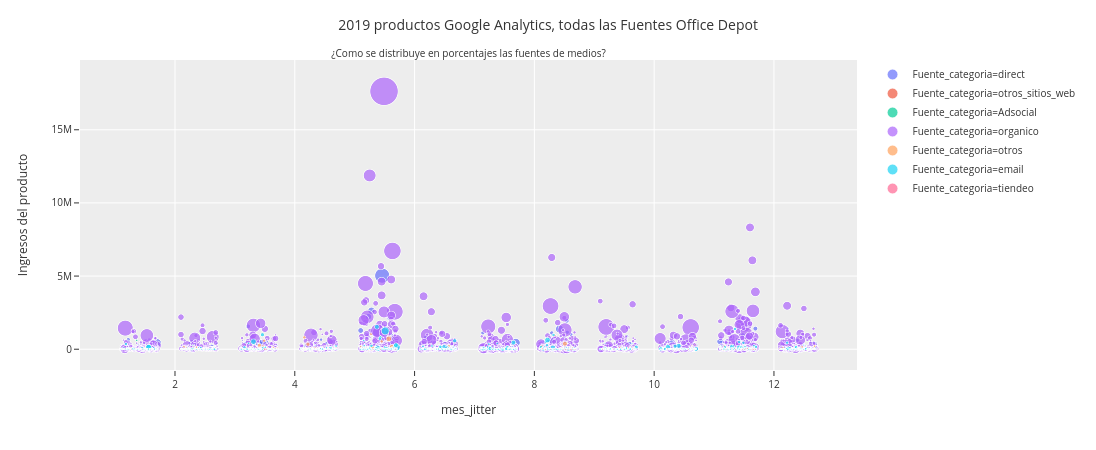

In [37]:
random.seed(1)
analytics_productos_limpio['mes_jitter'] = [random.randint(10,70) for i in range(analytics_productos_limpio.shape[0])]
analytics_productos_limpio['mes_jitter'] = analytics_productos_limpio.mes.astype(str) + "." + analytics_productos_limpio.mes_jitter.astype(str)

#nube de puntos productos google analytics
analytics_productos_limpio.Fuente_categoria.value_counts()
analytics_productos_limpio.groupby(['cuenta','Fuente_categoria']).count()

analytics_productos.cuenta.unique()

#Todas las fuentes
datos_interes = analytics_productos_limpio[analytics_productos_limpio['cuenta'] == 'Office Depot']

#animation_frame = 'mes'
fig = px.scatter(datos_interes, x="mes_jitter", y="Ingresos del producto", color="Fuente_categoria",size="Compras únicas", hover_name ="Producto_nuevo",color_continuous_scale=px.colors.sequential.Viridis) 

fig = fig.update_layout(
    title="2019 productos Google Analytics, todas las Fuentes " + str(datos_interes.cuenta.unique()[0]),
    font=dict(size=10),
    annotations = [dict(xref='paper',
                        yref='paper',
                        x=0.5, y=1.05,
                        showarrow=False,
                        text ='¿Como se distribuye en porcentajes las fuentes de medios?')],
                        template = 'ggplot2'
)

fig.show()

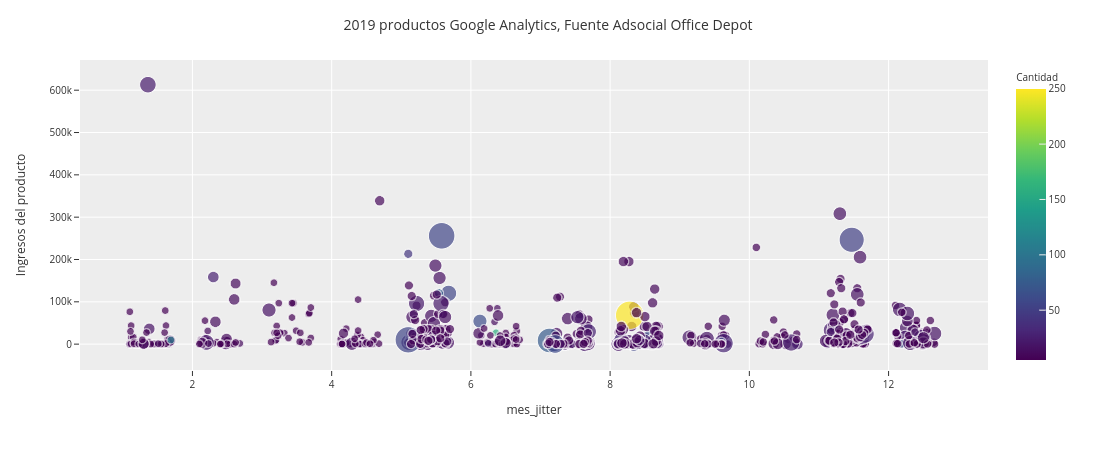

In [40]:
#Solo Adsocial
datos_interes = analytics_productos_limpio[(analytics_productos_limpio['Fuente_categoria'] == 'Adsocial') & (analytics_productos_limpio['cuenta'] == 'Office Depot')]

fig = px.scatter(datos_interes, x="mes_jitter", y="Ingresos del producto", color="Cantidad",size="Compras únicas", hover_name ="Producto_nuevo",color_continuous_scale=px.colors.sequential.Viridis) 

fig.update_layout(
    title="2019 productos Google Analytics, Fuente Adsocial " + str(datos_interes.cuenta.unique()[0]),
    font=dict(size=10),
    annotations = [dict(xref='paper',
                        yref='paper',
                        x=0.5, y=1.05,
                        showarrow=False,
                        text ='')],
                        template = 'ggplot2'
)

fig.show()

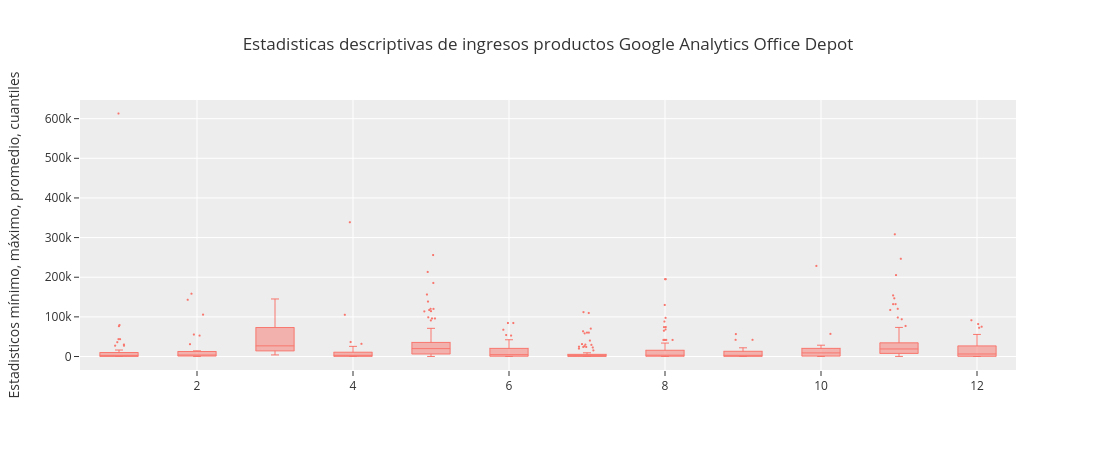

In [43]:
#caja y bigotes google analytics
#analytics_productos_limpio[analytics_productos_limpio['Ingresos del producto'] < 200] 
fig = go.Figure()

fig.add_trace(go.Box(
    y=datos_interes['Ingresos del producto'],
    x=datos_interes['mes'],
    jitter=0.5,
    whiskerwidth=0.2,
    marker_size=2,
    line_width=1)
    )

fig.update_layout(
    title = 'Estadisticas descriptivas de ingresos productos Google Analytics '  + str(datos_interes.cuenta.unique()[0]),
    title_x = 0.50,
    yaxis_title='Estadisticos mínimo, máximo, promedio, cuantiles',
    template = 'ggplot2'
    )

#fig.update_yaxes(tickprefix="$")
fig.show()